## LOAN DATA

## - File reading / Data ingetion

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = r"D:\ML\train_loan.xlsx"

In [3]:
df = pd.read_excel(path)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
df.sum().isnull()

id                            False
person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length             False
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                 False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
loan_status                   False
dtype: bool

In [5]:
df.duplicated().sum()

np.int64(0)

## Seperation of X and Y

In [6]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [7]:
x = df.drop(['id','loan_status'],axis=1)
y = df['loan_status']

In [8]:
x.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [10]:
a = y.value_counts()
a

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [11]:
y.shape

(58645,)

## Seperation of cat and num data

In [12]:
cat = x.columns[x.dtypes=='object']
num = x.columns[x.dtypes!='object']

In [13]:
print(cat)
print()
print(num)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')


## Create pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [15]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),   
    ('scaler',StandardScaler())             
])

cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),    
    ('encoder',OneHotEncoder())
])



In [16]:
## Compose both pipelines
pre = ColumnTransformer([('num' , num_pipeline, num),
                            ('cat' , cat_pipeline, cat) ])

In [17]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [18]:
## Apply tree to data
x_scaled = pre.fit_transform(x)

In [19]:
x_scaled

array([[ 1.56620019, -0.7657678 , -1.18719967, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92005729, -0.21212778,  0.32804728, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.2401962 , -0.92922343,  0.8331296 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.75430679, -0.52849351,  0.58058844, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92005729, -0.89758686, -0.68211735, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5716972 ,  0.28878463, -0.68211735, ...,  0.        ,
         1.        ,  0.        ]], shape=(58645, 26))

In [20]:
## Convert in dataframe
x_scaled = pd.DataFrame(x_scaled , columns=pre.get_feature_names_out())

In [21]:
x_scaled.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled , y , test_size=0.2 , random_state=3)

In [24]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(46916, 26) (46916,)
(11729, 26) (11729,)


In [25]:
x_train.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
49099,-0.754307,0.552423,-1.187200,-0.578306,-1.215247,-0.973242,-0.946489,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22709,0.074446,0.921516,0.075506,0.545035,-0.262920,-0.427932,0.046274,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41522,0.240196,-0.238492,-0.429576,-0.982709,-1.291038,-0.973242,0.046274,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44649,-0.920057,-0.370311,0.075506,0.140632,-0.915379,0.444564,-0.450108,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34453,-0.920057,-0.443918,-0.682117,0.140632,0.784970,0.553626,-0.698298,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
y_train.head()

49099    0
22709    0
41522    0
44649    0
34453    0
Name: loan_status, dtype: int64

In [27]:
x_test.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
43800,-0.588556,-0.502130,0.83313,-1.117510,-0.882427,-0.973242,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44991,-0.091305,0.684242,-1.18720,0.500101,-0.572673,-0.318870,0.542655,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28892,0.240196,1.211518,-1.18720,2.836651,-0.585854,0.771749,0.294464,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17086,0.240196,2.266070,-1.18720,2.656916,1.776840,0.008316,0.790845,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
38699,-0.588556,-0.739404,-1.18720,-0.758041,0.840989,-0.209808,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
y_test.head()

43800    0
44991    0
28892    0
17086    0
38699    0
Name: loan_status, dtype: int64

## Model fitting on train data

In [29]:
from sklearn.svm import SVC
svc = SVC()

In [30]:
x.shape

(58645, 11)

In [31]:
svc.fit(x_train , y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
svc.score(x_train , y_train)

0.9468198482394066

In [33]:
svc.score(x_test , y_test)

0.9426208542927785

In [34]:
from sklearn.metrics import classification_report , confusion_matrix

## Evaluation

In [35]:
train_pred = svc.predict(x_train)
test_pred = svc.predict(x_test)

In [36]:
print(classification_report(y_train , train_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40224
           1       0.92      0.68      0.79      6692

    accuracy                           0.95     46916
   macro avg       0.94      0.84      0.88     46916
weighted avg       0.95      0.95      0.94     46916



In [37]:
cfm = confusion_matrix(y_train , train_pred)

<Axes: >

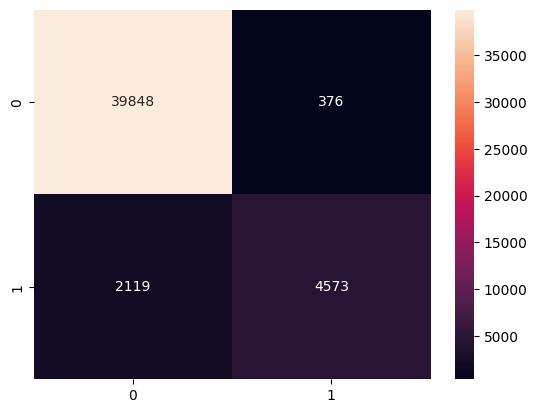

In [38]:
sns.heatmap(cfm , annot=True , fmt='d', xticklabels= True , yticklabels= True)

## Test Evaluation

In [39]:
print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10071
           1       0.91      0.66      0.76      1658

    accuracy                           0.94     11729
   macro avg       0.93      0.82      0.87     11729
weighted avg       0.94      0.94      0.94     11729



In [40]:
cfm_test = confusion_matrix(y_test , test_pred)
cfm_test

array([[9961,  110],
       [ 563, 1095]])

<Axes: >

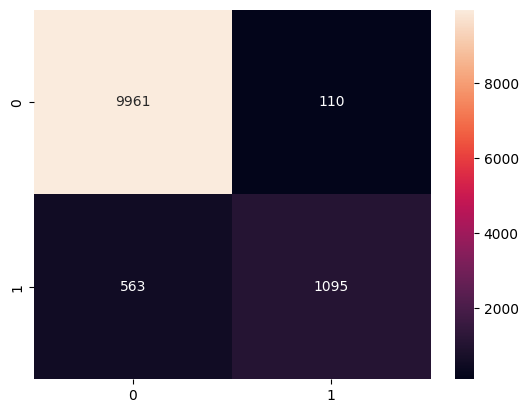

In [41]:
sns.heatmap(cfm_test , annot=True , fmt='d' , xticklabels= True , yticklabels= True)

## Oversampling method by smote
- synthetic monitoring oversamling technique

In [42]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE(random_state=3)

In [45]:
x.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [46]:
x_res , y_res = smote.fit_resample(x_train , y_train)

In [47]:
y_train.value_counts()

loan_status
0    40224
1     6692
Name: count, dtype: int64

## Oversampling method by smote
- adding records / rows / obsn in class which contains leass data

## Undersampling method by randomundersampler
- removing  obsn in class which contains maximum data till obsn number is same as that of another class

In [48]:
svc_res = SVC()


In [49]:
svc_res.fit(x_res , y_res)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [50]:
svc_res.score(x_train , y_train)

0.919558359621451

In [51]:
train_pred = svc.predict(x_train)

In [52]:
print(classification_report(y_train , train_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40224
           1       0.92      0.68      0.79      6692

    accuracy                           0.95     46916
   macro avg       0.94      0.84      0.88     46916
weighted avg       0.95      0.95      0.94     46916

